# Web Scraping and Exploratory Analysis Project
Using [`google-play-scraper`](https://pypi.org/project/google-play-scraper/) library

## Apps
Index| App | Link
:-- | :-- | :--
1 | Google Fit | https://play.google.com/store/apps/details?id=com.google.android.apps.fitness
2 | MyFitnessPal | https://play.google.com/store/apps/details?id=com.myfitnesspal.android
3 | Samsung Health | https://play.google.com/store/apps/details?id=com.sec.android.app.shealth
4 | Addidas Running | https://play.google.com/store/apps/details?id=com.runtastic.android
5 | Nike Run Club | https://play.google.com/store/apps/details?id=com.nike.plusgps
6 | Runkeeper | https://play.google.com/store/apps/details?id=com.fitnesskeeper.runkeeper.pro
7 | Run Motion | https://play.google.com/store/apps/details?id=com.runmotion.android
8 | Wahoo Fitness | https://play.google.com/store/apps/details?id=com.wahoofitness.fitness
9 | Map My Ride | https://play.google.com/store/apps/details?id=com.mapmyride.android2
10 | 5k Runner | https://play.google.com/store/apps/details?id=com.clearskyapps.fitnessfamily.Run5K

In [6]:
# importing libraries
import pandas as pd
from google_play_scraper import Sort, reviews

In [2]:
# creating function to get data from each app
def app_data(app_id, num_reviews):
    '''
    You can get the appId (str) from it's Google Play Store url. This will return a 
    dataframe for each app with num_review (int) reviews.
    '''
    result, token = reviews(app_id, count = num_reviews)
    columns = ['userName', 'content', 'score', 'thumbsUpCount', \
               'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']
    
    return pd.DataFrame(result)[columns]

In [3]:
# saving each app_id
google = 'com.google.android.apps.fitness'
myfitpal = 'com.myfitnesspal.android'
samsung = 'com.sec.android.app.shealth'
addidas = 'com.runtastic.android'
nike = 'com.nike.plusgps'
runkeeper = 'com.fitnesskeeper.runkeeper.pro'
runmotion = 'com.runmotion.android'
wahoo = 'com.wahoofitness.fitness'
mapmyride = 'com.mapmyride.android2'
fivekrun = 'com.clearskyapps.fitnessfamily.Run5K'

In [4]:
# creating a list of app_ids for for loop
app_ids = [google, myfitpal, samsung, addidas, nike, runkeeper, runmotion, wahoo, mapmyride, fivekrun]

In [10]:
# using loop to get list of dataframes for each of the app_ids
review_data = []

for app_id_ in app_ids:
    review_data.append(app_data(app_id_, 5000))
    
review_data

[               userName                                            content  \
 0               Marleen  Great App to keep you motivated. I like the WH...   
 1          Arvind Patel                                          Very good   
 2           Mahendra VS  App not recording steps since few days. I also...   
 3       Jeofrey Pereira  The app has stopped working again as of 8th Ju...   
 4     Madison McClendon  Once you put an activity in the journal there'...   
 ...                 ...                                                ...   
 4995        Sushil Soni                                        Very useful   
 4996         Mudit Goel  With the recent update it is not tracking my a...   
 4997      Vimal Vadgama                                               Good   
 4998  Muxsinbek Yusupov                                          Very good   
 4999   Shazzadur Rahman                          Very nice & effective app   
 
       score  thumbsUpCount         reviewCreatedV

In [11]:
len(review_data)

10

In [12]:
# saving dfs
# saving each app_id
google = review_data[0]
myfitpal = review_data[1]
samsung = review_data[2]
addidas = review_data[3]
nike = review_data[4]
runkeeper = review_data[5]
runmotion = review_data[6]
wahoo = review_data[7]
mapmyride = review_data[8]
fivekrun = review_data[9]

In [15]:
# adding column to each app for app name
google['app'] = 'google'
myfitpal['app'] = 'myfitpal'
samsung['app'] = 'samsung'
addidas['app'] = 'addidas'
nike['app'] = 'nike'
runkeeper['app'] = 'runkeeper'
runmotion['app'] = 'runmotion'
wahoo['app'] = 'wahoo'
mapmyride['app'] = 'mapmyride'
fivekrun['app'] = 'fivekrun'

In [18]:
# creating list of dfs to concat
dfs = [google, myfitpal, samsung, addidas, nike, runkeeper, runmotion, wahoo, mapmyride, fivekrun]

# combining all the data
df = pd.concat(dfs).reset_index().drop(columns = ['index'])[['app', 'score', 'at', \
                                                        'thumbsUpCount', 'userName', 'content']]
df

,app,score,at,thumbsUpCount,userName,content
0,google,5,2022-06-07 21:48:55,0,Marleen,Great App to keep you motivated. I like the WH...
1,google,5,2022-06-07 21:44:03,0,Arvind Patel,Very good
2,google,1,2022-06-07 21:34:23,0,Mahendra VS,App not recording steps since few days. I also...
3,google,1,2022-06-07 20:06:28,0,Jeofrey Pereira,The app has stopped working again as of 8th Ju...
4,google,1,2022-06-07 18:24:16,0,Madison McClendon,Once you put an activity in the journal there'...
...,...,...,...,...,...,...
45012,fivekrun,5,2018-01-21 07:11:01,0,A Google user,Love the app... Could use support for treadmil...
45013,fivekrun,4,2018-01-21 06:30:36,0,A Google user,Occasional glitches when app freezes or seems ...
45014,fivekrun,5,2018-01-18 22:40:59,0,A Google user,"Very helpful, fun!"
45015,fivekrun,5,2018-01-17 10:59:14,0,A Google user,Very happy with this app.


In [19]:
# looking at results per app (missing x5000 if 5000 for each)
df.app.value_counts()

fivekrun     5000
mapmyride    5000
addidas      5000
myfitpal     5000
runkeeper    5000
nike         5000
google       5000
samsung      5000
wahoo        5000
runmotion      17
Name: app, dtype: int64

### Dropping `runmotion` since only has x17 reviews

In [24]:
df2 = df[df.app != 'runmotion'].reset_index().drop(columns = 'index')
df2

,app,score,at,thumbsUpCount,userName,content
0,google,5,2022-06-07 21:48:55,0,Marleen,Great App to keep you motivated. I like the WH...
1,google,5,2022-06-07 21:44:03,0,Arvind Patel,Very good
2,google,1,2022-06-07 21:34:23,0,Mahendra VS,App not recording steps since few days. I also...
3,google,1,2022-06-07 20:06:28,0,Jeofrey Pereira,The app has stopped working again as of 8th Ju...
4,google,1,2022-06-07 18:24:16,0,Madison McClendon,Once you put an activity in the journal there'...
...,...,...,...,...,...,...
44995,fivekrun,5,2018-01-21 07:11:01,0,A Google user,Love the app... Could use support for treadmil...
44996,fivekrun,4,2018-01-21 06:30:36,0,A Google user,Occasional glitches when app freezes or seems ...
44997,fivekrun,5,2018-01-18 22:40:59,0,A Google user,"Very helpful, fun!"
44998,fivekrun,5,2018-01-17 10:59:14,0,A Google user,Very happy with this app.


# Q1: Which App Has Highest Average Rating?

In [33]:
# creating dfs for each app
apps = ['google', 'myfitpal', 'samsung', 'addidas', 'nike', \
        'runkeeper', 'runmotion', 'wahoo', 'mapmyride', 'fivekrun']

In [34]:
dict_ = {}

for app_ in apps:
    dict_[f'{app_}'] = df2[df2.app == app_]

In [41]:
dict_.keys()

dict_keys(['google', 'myfitpal', 'samsung', 'addidas', 'nike', 'runkeeper', 'runmotion', 'wahoo', 'mapmyride', 'fivekrun'])

In [48]:
list(dict_.keys())

['google',
 'myfitpal',
 'samsung',
 'addidas',
 'nike',
 'runkeeper',
 'runmotion',
 'wahoo',
 'mapmyride',
 'fivekrun']

In [49]:
apps

['google',
 'myfitpal',
 'samsung',
 'addidas',
 'nike',
 'runkeeper',
 'runmotion',
 'wahoo',
 'mapmyride',
 'fivekrun']

### Actually, already had this

In [50]:
google.head(2)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app
0,Marleen,Great App to keep you motivated. I like the WH...,5,0,2.80.2.arm64-v8a.release,2022-06-07 21:48:55,None,NaT,google
1,Arvind Patel,Very good,5,0,2.80.2.armeabi-v7a.release,2022-06-07 21:44:03,None,NaT,google


In [79]:
from statistics import mode

avg_scores = []
median_scores = []

for df in dfs:
    avg_scores.append(df.score.mean())
    median_scores.append(df.score.median())


In [88]:
pd.DataFrame([apps, avg_scores])\
                    .T\
                    .rename(columns = {0: 'app', 1: 'avg'})\
                    .sort_values(by = 'avg', ascending = False)\
                    .set_index('app')\
#                     .plot.barh()

,avg
app,
mapmyride,4.6352
fivekrun,4.524
addidas,3.8364
myfitpal,3.8282
runkeeper,3.7024
wahoo,3.658
google,3.0104
samsung,2.8072
nike,2.805


<AxesSubplot:ylabel='app'>

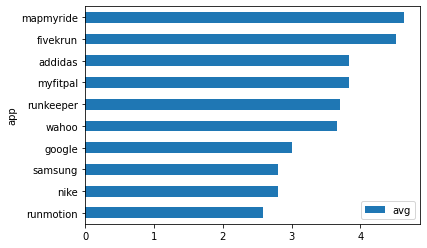

In [90]:
pd.DataFrame([apps, avg_scores])\
                    .T\
                    .rename(columns = {0: 'app', 1: 'avg'})\
                    .sort_values(by = 'avg')\
                    .set_index('app')\
                    .plot.barh()

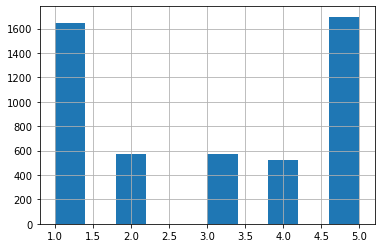

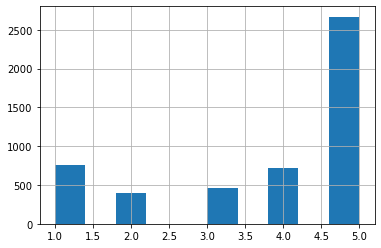

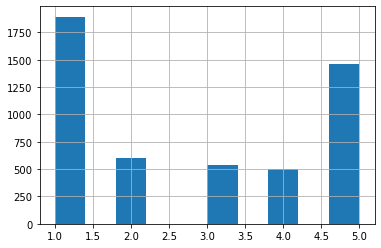

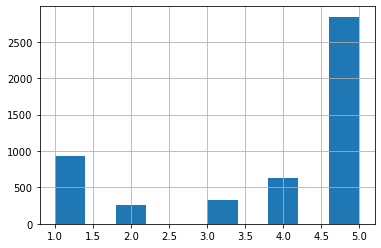

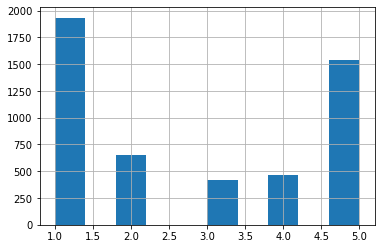

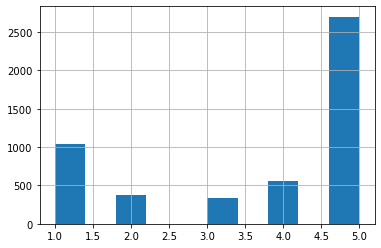

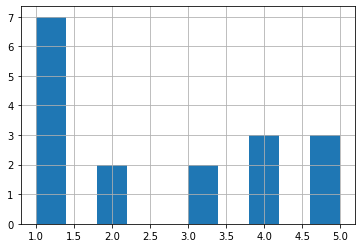

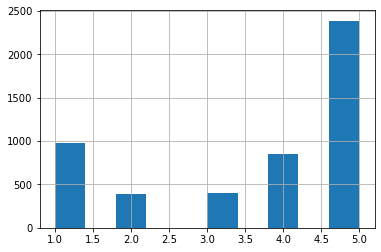

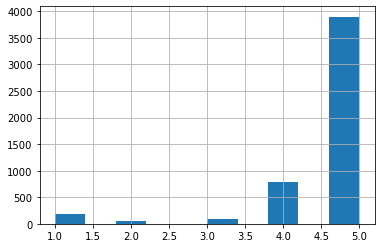

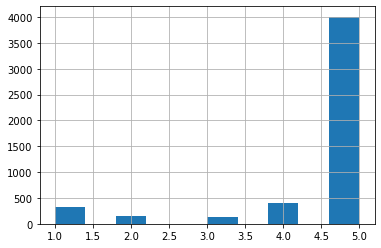

In [84]:
import matplotlib.pyplot as plt
for df in dfs:
    df.score.hist()
    plt.show()
    

# Q2: What are the Most Frequently Used Words for Each App?

In [100]:
df2.head(2)

,app,score,at,thumbsUpCount,userName,content
0,google,5,2022-06-07 21:48:55,0,Marleen,Great App to keep you motivated. I like the WH...
1,google,5,2022-06-07 21:44:03,0,Arvind Patel,Very good


In [165]:
import nltk
import unicodedata
import re

# text cleanup
def clean_txt(text):
    '''
    Takes in a list of strings and cleans the text
    '''
    #lemmatize text
    lem = nltk.stem.WordNetLemmatizer()
    
    #remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    
    #normalize text
    clean_text = (unicodedata.normalize('NFKD', text)\
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    
    return ' '.join([lem.lemmatize(word) for word in words if word not in stopwords])

In [167]:
clean_txt(df2[df2.app == 'google'].content[0])

'great app keep motivated like weekly recommended movement point'

In [124]:
# relative percentages
(pd.Series(clean_txt(' '.join(df2[df2.app == 'google'].content))).value_counts()/len(clean_txt(' '.join(df2[df2.app == 'google'].content)))) *100

app          4.332052
step         2.622221
google       1.487122
good         1.341643
fit          1.212328
               ...   
leveraged    0.001796
drew         0.001796
decide       0.001796
startplz     0.001796
remaining    0.001796
Length: 5993, dtype: float64

<AxesSubplot:>

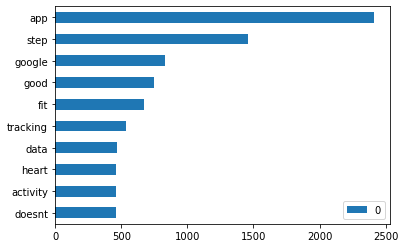

In [121]:
pd.DataFrame(pd.Series(clean_txt(' '.join(df2[df2.app == 'google'].content))).value_counts())\
                .head(10).sort_values(by = 0).plot.barh()

In [177]:
df2.head(2)

,app,score,at,thumbsUpCount,userName,content,clean_txt
0,google,5,2022-06-07 21:48:55,0,Marleen,Great App to keep you motivated. I like the WH...,great app keep motivated like weekly recommend...
1,google,5,2022-06-07 21:44:03,0,Arvind Patel,Very good,good


In [202]:
# looping through each row to create clean text field from content
lines = []

for line in df2.content:
    lines.append(clean_txt(line))
    
lines[:10]

['great app keep motivated like weekly recommended movement point',
 'good',
 'app recording step since day also reinstalled app still working',
 'app stopped working 8th june 2022 frustrating',
 'put activity journal there option edit heaven help accidentally try put two activity forget edit time overlap fit invent new activity weirdly combine two doesnt record either accurately isnt editable app designed moron',
 'app useless way use fitbit adidas workout running app sync google fit issue google acquired fitbit provide synced option apps',
 'great far gonna keep using regularly',
 'tracker waaayy overestimating calorie burned app wont sync import data fitness band reliable fitness apps',
 'good',
 'excellent']

In [172]:
# creating clean text col
df2['clean_txt'] = lines

df2

,app,score,at,thumbsUpCount,userName,content,clean_txt
0,google,5,2022-06-07 21:48:55,0,Marleen,Great App to keep you motivated. I like the WH...,great app keep motivated like weekly recommend...
1,google,5,2022-06-07 21:44:03,0,Arvind Patel,Very good,good
2,google,1,2022-06-07 21:34:23,0,Mahendra VS,App not recording steps since few days. I also...,app recording step since day also reinstalled ...
3,google,1,2022-06-07 20:06:28,0,Jeofrey Pereira,The app has stopped working again as of 8th Ju...,app stopped working 8th june 2022 frustrating
4,google,1,2022-06-07 18:24:16,0,Madison McClendon,Once you put an activity in the journal there'...,put activity journal there option edit heaven ...
...,...,...,...,...,...,...,...
44995,fivekrun,5,2018-01-21 07:11:01,0,A Google user,Love the app... Could use support for treadmil...,love app could use support treadmill cross cou...
44996,fivekrun,4,2018-01-21 06:30:36,0,A Google user,Occasional glitches when app freezes or seems ...,occasional glitch app freeze seems jump stage ...
44997,fivekrun,5,2018-01-18 22:40:59,0,A Google user,"Very helpful, fun!",helpful fun
44998,fivekrun,5,2018-01-17 10:59:14,0,A Google user,Very happy with this app.,happy app


In [173]:
apps

['google',
 'myfitpal',
 'samsung',
 'addidas',
 'nike',
 'runkeeper',
 'runmotion',
 'wahoo',
 'mapmyride',
 'fivekrun']

In [181]:
def add_clean(app_df):
    '''
    This function takes in an app df and adds a clean_txt column with the content run through
    the text cleaning function.
    '''
    lines = []
    
    for line in app_df.content:
        lines.append(clean_txt(line))
        
    app_df['clean_txt'] = lines
        
    return app_df

In [182]:
add_clean(google)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app,clean_txt
0,Marleen,Great App to keep you motivated. I like the WH...,5,0,2.80.2.arm64-v8a.release,2022-06-07 21:48:55,None,NaT,google,great app keep motivated like weekly recommend...
1,Arvind Patel,Very good,5,0,2.80.2.armeabi-v7a.release,2022-06-07 21:44:03,None,NaT,google,good
2,Mahendra VS,App not recording steps since few days. I also...,1,0,2.80.2.arm64-v8a.release,2022-06-07 21:34:23,None,NaT,google,app recording step since day also reinstalled ...
3,Jeofrey Pereira,The app has stopped working again as of 8th Ju...,1,0,2.80.2.arm64-v8a.release,2022-06-07 20:06:28,"Hi Jeofrey, we’d suggest checking if there wer...",2022-05-31 19:31:20,google,app stopped working 8th june 2022 frustrating
4,Madison McClendon,Once you put an activity in the journal there'...,1,0,2.80.2.arm64-v8a.release,2022-06-07 18:24:16,None,NaT,google,put activity journal there option edit heaven ...
...,...,...,...,...,...,...,...,...,...,...
4995,Sushil Soni,Very useful,4,0,None,2021-11-22 07:19:10,None,NaT,google,useful
4996,Mudit Goel,With the recent update it is not tracking my a...,1,1,2.69.7.arm64-v8a.production,2021-11-22 06:06:55,Hi Mudit. Sorry to hear you're experiencing is...,2021-11-22 06:11:44,google,recent update tracking activity background nei...
4997,Vimal Vadgama,Good,5,0,2.68.2.arm64-v8a.production,2021-11-22 05:19:31,None,NaT,google,good
4998,Muxsinbek Yusupov,Very good,5,0,2.69.7.arm64-v8a.production,2021-11-22 04:41:09,None,NaT,google,good


In [184]:
# adding clean col to dfs
google = add_clean(google)
myfitpal = add_clean(myfitpal)
samsung = add_clean(samsung)
addidas = add_clean(addidas)
nike = add_clean(nike)
runkeeper = add_clean(runkeeper)
runmotion = add_clean(runmotion)
wahoo = add_clean(wahoo)
mapmyride = add_clean(mapmyride)
fivekru = add_clean(fivekrun)

In [201]:
google.head(2)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app,clean_txt
0,Marleen,Great App to keep you motivated. I like the WH...,5,0,2.80.2.arm64-v8a.release,2022-06-07 21:48:55,None,NaT,google,great app keep motivated like weekly recommend...
1,Arvind Patel,Very good,5,0,2.80.2.armeabi-v7a.release,2022-06-07 21:44:03,None,NaT,google,good


In [197]:
# looking at first clean text row
google.clean_txt[0].split()

['great',
 'app',
 'keep',
 'motivated',
 'like',
 'weekly',
 'recommended',
 'movement',
 'point']

In [211]:
# code to get word count
len(google.clean_txt[0].split())

9

In [200]:
# stripping whitespace to get non-space character count
google.clean_txt[0].replace(' ', '')

'greatappkeepmotivatedlikeweeklyrecommendedmovementpoint'

In [196]:
# code to get character count
len(google.clean_txt[0].replace(' ', ''))

55

In [219]:
def char_word_ct(app_df):
    '''
    This function takes in a df and creates a column for each row's cleaned content character 
    and then word count.
    '''
    #initializing empty lists
    char_ct = []
    word_ct = []
    
    for line in app_df.clean_txt:
        char_ct.append(len(line.replace(' ', '')))
        word_ct.append(len(line.split()))
        
    app_df['char_ct'] = char_ct
    app_df['word_ct'] = word_ct
    
    return app_df

In [220]:
char_word_ct(google)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app,clean_txt,char_ct,word_ct
0,Marleen,Great App to keep you motivated. I like the WH...,5,0,2.80.2.arm64-v8a.release,2022-06-07 21:48:55,None,NaT,google,great app keep motivated like weekly recommend...,55,9
1,Arvind Patel,Very good,5,0,2.80.2.armeabi-v7a.release,2022-06-07 21:44:03,None,NaT,google,good,4,1
2,Mahendra VS,App not recording steps since few days. I also...,1,0,2.80.2.arm64-v8a.release,2022-06-07 21:34:23,None,NaT,google,app recording step since day also reinstalled ...,54,10
3,Jeofrey Pereira,The app has stopped working again as of 8th Ju...,1,0,2.80.2.arm64-v8a.release,2022-06-07 20:06:28,"Hi Jeofrey, we’d suggest checking if there wer...",2022-05-31 19:31:20,google,app stopped working 8th june 2022 frustrating,39,7
4,Madison McClendon,Once you put an activity in the journal there'...,1,0,2.80.2.arm64-v8a.release,2022-06-07 18:24:16,None,NaT,google,put activity journal there option edit heaven ...,186,33
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Sushil Soni,Very useful,4,0,None,2021-11-22 07:19:10,None,NaT,google,useful,6,1
4996,Mudit Goel,With the recent update it is not tracking my a...,1,1,2.69.7.arm64-v8a.production,2021-11-22 06:06:55,Hi Mudit. Sorry to hear you're experiencing is...,2021-11-22 06:11:44,google,recent update tracking activity background nei...,108,17
4997,Vimal Vadgama,Good,5,0,2.68.2.arm64-v8a.production,2021-11-22 05:19:31,None,NaT,google,good,4,1
4998,Muxsinbek Yusupov,Very good,5,0,2.69.7.arm64-v8a.production,2021-11-22 04:41:09,None,NaT,google,good,4,1


In [221]:
df2.head(2)

,app,score,at,thumbsUpCount,userName,content,clean_txt
0,google,5,2022-06-07 21:48:55,0,Marleen,Great App to keep you motivated. I like the WH...,great app keep motivated like weekly recommend...
1,google,5,2022-06-07 21:44:03,0,Arvind Patel,Very good,good


In [ ]:
# adding character and word count columns
# adding clean col to dfs
google = add_clean(google)
myfitpal = add_clean(myfitpal)
samsung = add_clean(samsung)
addidas = add_clean(addidas)
nike = add_clean(nike)
runkeeper = add_clean(runkeeper)
runmotion = add_clean(runmotion)
wahoo = add_clean(wahoo)
mapmyride = add_clean(mapmyride)
fivekru = add_clean(fivekrun)